In [ ]:
!pip install langchain_experimental
!pip install tabulate
!pip install langchain


In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from langchain.agents import load_tools
from langchain_experimental.agents import create_pandas_dataframe_agent 
from langchain.chat_models import ChatOpenAI
from datetime import datetime

In [2]:
# Function to convert string to time object
def convert_to_time(time_str):
    return datetime.strptime(time_str, '%H:%M').time()

In [3]:
csv_file_path ="/workspaces/LLM_Testing/Data/synthetic_go_transit_ridership_data.csv"
data_types = {
    'farecard_id': 'str',
    'origin': 'str',
    'destination': 'str',
    'fare': 'float',
    'concession': 'category'
}

df = pd.read_csv(csv_file_path, dtype=data_types, parse_dates=['business_date'])

df['tap_on_time'] = df['tap_on_time'].apply(convert_to_time)
df['tap_off_time'] = df['tap_off_time'].apply(convert_to_time)

In [5]:
# Initializing the agent 
llm = ChatOpenAI(model_name="gpt-4",temperature=0)
tools = load_tools(["google-serper", "llm-math"], llm=llm)
agent = create_pandas_dataframe_agent(llm=llm, df=df,agenttype="zero-shot-react-description", verbose=True, tools = tools) 

In [6]:
agent("What is the shape of the dataset?")



> Entering new AgentExecutor chain...
Thought: To find the shape of the dataset, I can use the shape attribute of the pandas dataframe.
Action: python_repl_ast
Action Input: df.shape
Observation: (50000, 8)
Thought:I now know the final answer
Final Answer: The dataset has 50000 rows and 8 columns.

> Finished chain.


{'input': 'What is the shape of the dataset?',
 'output': 'The dataset has 50000 rows and 8 columns.'}

In [7]:
agent("what is the farecard id of the most frequent rider")



> Entering new AgentExecutor chain...
Thought: To find the farecard id of the most frequent rider, I need to count the number of occurrences of each farecard id in the dataframe. The farecard id with the highest count is the most frequent rider.
Action: python_repl_ast
Action Input: df['farecard_id'].value_counts().idxmax()
Observation: L5VP7T62Z7
Thought:I now know the final answer
Final Answer: The farecard id of the most frequent rider is L5VP7T62Z7.

> Finished chain.


{'input': 'what is the farecard id of the most frequent rider',
 'output': 'The farecard id of the most frequent rider is L5VP7T62Z7.'}

In [15]:
agent("display the total fare of the top 10% most frequent riders")



> Entering new AgentExecutor chain...
Thought: To solve this, I need to first identify the top 10% most frequent riders. This can be done by counting the number of occurrences of each `farecard_id` in the dataframe. Then, I will select the top 10% of these riders. After that, I will calculate the total fare for these riders.

Action: Use the `value_counts` function to count the number of occurrences of each `farecard_id`.
Action Input: `df['farecard_id'].value_counts()`
Observation: Use the `value_counts` function to count the number of occurrences of each `farecard_id`. is not a valid tool, try one of [python_repl_ast].
Thought:I need to execute the command in a Python shell to get the count of each `farecard_id`.
Action: python_repl_ast
Action Input: df['farecard_id'].value_counts()
Observation: farecard_id
L5VP7T62Z7    16
CMO5GWJ9T9    15
04VZUP2MJM    15
45STR089FL    15
AY8ID7F1S4    14
              ..
KENIKU5FE0     1
0KWSFMVNNR     1
FNTVCO453A     1
ZC0HDC04NM     1
EORSUSO

{'input': 'display the total fare of the top 10% most frequent riders',
 'output': 'The total fare of the top 10% most frequent riders is 85357.83.'}



> Entering new AgentExecutor chain...
Thought: To make a bar chart for total fare by origin station for the top 10 origin stations, I need to first group the data by 'origin' and sum the 'fare'. Then, I need to sort the result and select the top 10. Finally, I can use the plot function to create the bar chart.
Action: python_repl_ast
Action Input: df.groupby('origin')['fare'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:The command has successfully created a bar chart for total fare by origin station for the top 10 origin stations. However, I can't see the chart in this text-based environment. In a regular Python environment, a bar chart would have been displayed.
Final Answer: The command to create a bar chart for total fare by origin station for the top 10 origin stations is `df.groupby('origin')['fare'].sum().sort_values(ascending=False).head(10).plot(kind='bar')`.

> Finished chain.


{'input': 'make a bar chart for total fare by origin station for the top 10 origin stations',
 'output': "The command to create a bar chart for total fare by origin station for the top 10 origin stations is `df.groupby('origin')['fare'].sum().sort_values(ascending=False).head(10).plot(kind='bar')`."}

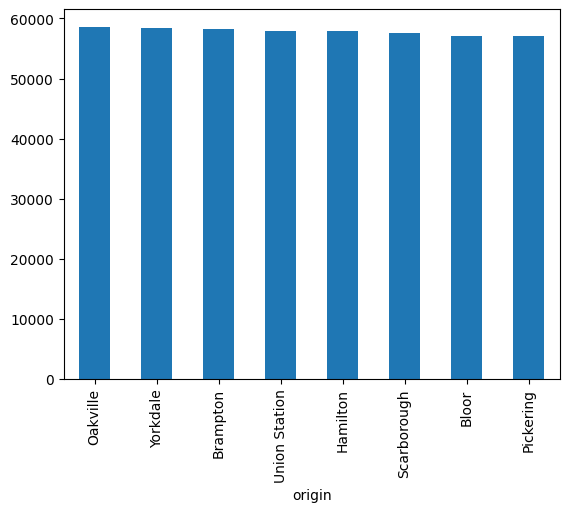

In [16]:
agent("make a bar chart for total fare by origin station for the top 10 origin stations")



> Entering new AgentExecutor chain...
Thought: To find the top 10 origin stations by total fare, I need to group the dataframe by 'origin' and sum the 'fare' column. Then, I will sort the result in descending order and select the top 10.
Action: python_repl_ast
Action Input: df.groupby('origin')['fare'].sum().sort_values(ascending=False).head(10)
Observation: origin
Oakville         58604.72
Yorkdale         58333.87
Brampton         58226.25
Union Station    57961.49
Hamilton         57835.15
Scarborough      57604.82
Bloor            57120.37
Pickering        57009.83
Name: fare, dtype: float64
Thought:The top origin stations by total fare are Oakville, Yorkdale, Brampton, Union Station, Hamilton, Scarborough, Bloor, and Pickering. Now, I need to find the number of unique customers for these stations. I will filter the dataframe to only include rows where the origin is one of these stations, then group by 'origin' and count the unique 'farecard_id'.
Action: python_repl_ast
Action I

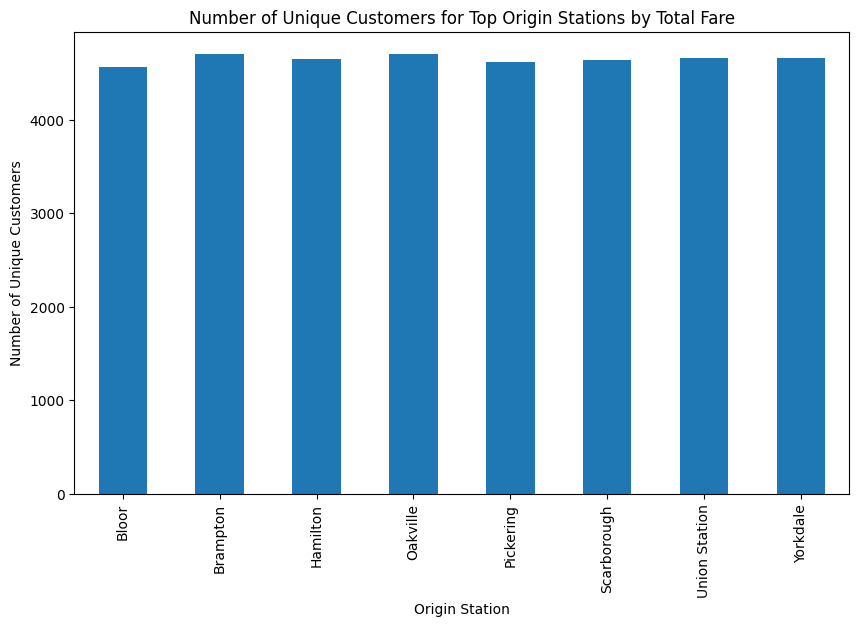

The number of unique customers for the top origin stations by total fare are as follows: Bloor has 4563, Brampton has 4704, Hamilton has 4648, Oakville has 4706, Pickering has 4616, Scarborough has 4636, Union Station has 4661, and Yorkdale has 4661. Now, I will create a bar chart of these values using matplotlib.
Action: python_repl_ast
Action Input: 
import matplotlib.pyplot as plt

unique_customers = df[df['origin'].isin(['Oakville', 'Yorkdale', 'Brampton', 'Union Station', 'Hamilton', 'Scarborough', 'Bloor', 'Pickering'])].groupby('origin')['farecard_id'].nunique()
unique_customers.plot(kind='bar', figsize=(10,6))
plt.title('Number of Unique Customers for Top Origin Stations by Total Fare')
plt.xlabel('Origin Station')
plt.ylabel('Number of Unique Customers')
plt.show()
Observation: 
Thought:I have created a bar chart showing the number of unique customers for the top origin stations by total fare. The chart shows that all stations have a similar number of unique customers, with Br

{'input': 'find the top 10 origin stations by total fare, then make a bar chart of the number of unique customers for these stations',
 'output': 'The bar chart shows the number of unique customers for the top origin stations by total fare. The stations with the most unique customers are Brampton and Oakville.'}

In [18]:
agent("find the top 10 origin stations by total fare, then make a bar chart of the number of unique customers for these stations")

In [19]:
agent("what is the average fare per trip for the top 10% most frequent customers")



> Entering new AgentExecutor chain...
Thought: To answer this question, I need to first identify the top 10% most frequent customers. This can be done by counting the number of trips each customer (identified by `farecard_id`) has made. Then, I can calculate the average fare for these customers.
Action: python_repl_ast
Action Input: df['farecard_id'].value_counts()
Observation: farecard_id
L5VP7T62Z7    16
CMO5GWJ9T9    15
04VZUP2MJM    15
45STR089FL    15
AY8ID7F1S4    14
              ..
KENIKU5FE0     1
0KWSFMVNNR     1
FNTVCO453A     1
ZC0HDC04NM     1
EORSUSO4EE     1
Name: count, Length: 9926, dtype: int64
Thought:The output shows the number of trips each customer has made, sorted in descending order. Now, I need to identify the top 10% most frequent customers. To do this, I can calculate the number of unique customers that make up the top 10%.
Action: python_repl_ast
Action Input: top_10_percent = int(0.1 * df['farecard_id'].nunique())
Observation: 
Thought:Now I have calculat

{'input': 'what is the average fare per trip for the top 10% most frequent customers',
 'output': 'The average fare per trip for the top 10% most frequent customers is approximately 9.29.'}

In [20]:
agent("make a map showing the top 10 origin stations by fare revenue")



> Entering new AgentExecutor chain...
Thought: To answer this question, I need to group the data by 'origin' and sum the 'fare' for each group. Then, I need to sort the result in descending order and select the top 10. 

Action: python_repl_ast
Action Input: df.groupby('origin')['fare'].sum().sort_values(ascending=False).head(10)
Observation: origin
Oakville         58604.72
Yorkdale         58333.87
Brampton         58226.25
Union Station    57961.49
Hamilton         57835.15
Scarborough      57604.82
Bloor            57120.37
Pickering        57009.83
Name: fare, dtype: float64
Thought:I have the top origin stations by fare revenue. However, the question asks for a map, which requires geographical data that is not present in the current dataframe. Therefore, I cannot create a map. 
Final Answer: It is not possible to create a map with the current data as it does not contain geographical information.

> Finished chain.


{'input': 'make a map showing the top 10 origin stations by fare revenue',
 'output': 'It is not possible to create a map with the current data as it does not contain geographical information.'}

In [21]:
agent("is there a stastically significant difference in the distribution of total fare of the riders who have taken at least one trip from Oakville compared to the riders who have taken at least one trip from Scarborough?")



> Entering new AgentExecutor chain...
Thought: To answer this question, we first need to identify the riders who have taken at least one trip from Oakville and Scarborough. Then, we need to calculate the total fare for each rider. After that, we can perform a statistical test to see if there is a significant difference in the distribution of total fare between the two groups of riders.

Action: python_repl_ast
Action Input: oakville_riders = df[df['origin'] == 'Oakville']['farecard_id'].unique()
Observation: 
Thought:We have identified the unique farecard_ids of riders who have taken at least one trip from Oakville. Now, we need to do the same for riders who have taken at least one trip from Scarborough.

Action: python_repl_ast
Action Input: scarborough_riders = df[df['origin'] == 'Scarborough']['farecard_id'].unique()
Observation: 
Thought:We have identified the unique farecard_ids of riders who have taken at least one trip from Scarborough. Now, we need to calculate the total fare

{'input': 'is there a stastically significant difference in the distribution of total fare of the riders who have taken at least one trip from Oakville compared to the riders who have taken at least one trip from Scarborough?',
 'output': 'No, there is not a statistically significant difference in the distribution of total fare of the riders who have taken at least one trip from Oakville compared to the riders who have taken at least one trip from Scarborough.'}